In [3]:
import pandas as pd
import numpy as np
import json
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # to conver address to lat and long values
!conda install -c conda-forge bs4 --yes
import requests # handle requests
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize # JSON to pandas dataframe

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
!conda install -c conda-forge folium --yes
import folium # for maps

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          98 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0



geopy-2.1.0          | 64 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

In [4]:
data = requests.get('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai').text

In [5]:
soup = BeautifulSoup(data, 'html.parser') # BeautifulSoup object to parse data
area = []
location = []
latitudes = []
longitudes = []

In [6]:
for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if(len(cells) > 0): # condition because some rows may be empty && first row is header
        area.append(cells[0].text.rstrip('\n'))
        location.append(cells[1].text.rstrip('\n'))
        latitudes.append(cells[2].text.rstrip('\n'))
        longitudes.append(cells[3].text.rstrip('\n'))

In [7]:
mumbai_df = pd.DataFrame({'Area': area,
                           'Location': location,
                           'Latitude': latitudes,
                           'Longitude': longitudes})
print(mumbai_df.shape)

mumbai_df


(93, 4)


,Area,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.82721
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.82927
...,...,...,...,...
88,Parel,South Mumbai,18.99,72.84
89,Gowalia Tank,"Tardeo,South Mumbai",18.96245,72.809703
90,Dava Bazaar,South Mumbai,18.946882,72.831362
91,Dharavi,Mumbai,19.040208,72.85085


In [8]:
len(mumbai_df['Location'].unique())

31

In [10]:
mumbai_df = mumbai_df.dropna()
mumbai_df = mumbai_df.reset_index(drop=True)
mumbai_df

,Area,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.82721
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.82927
...,...,...,...,...
88,Parel,South Mumbai,18.99,72.84
89,Gowalia Tank,"Tardeo,South Mumbai",18.96245,72.809703
90,Dava Bazaar,South Mumbai,18.946882,72.831362
91,Dharavi,Mumbai,19.040208,72.85085


In [11]:
mumbai_df.value_counts()

Area               Location                        Latitude   Longitude
Worli              South Mumbai                    19         72.815       1
Dhobitalao         South Mumbai                    18.9433    72.8286      1
Cuffe Parade       South Mumbai                    18.91      72.81        1
Cumbala Hill       South Mumbai                    18.965833  72.805833    1
Currey Road        South Mumbai                    18.994     72.833       1
                                                                          ..
Marol              Andheri,Western Suburbs         19.119219  72.882743    1
Matunga            South Mumbai                    19.01798   72.844763    1
Mira Road          Mira-Bhayandar,Western Suburbs  19.284167  72.871111    1
Mumbai Central     South Mumbai                    18.9697    72.8194      1
Aarey Milk Colony  Goregaon,Western Suburbs        19.148493  72.881756    1
Length: 93, dtype: int64

In [12]:
mumbai_df['Area'].unique().tolist()

['Amboli',
 'Chakala, Andheri',
 'D.N. Nagar',
 'Four Bungalows',
 'Lokhandwala',
 'Marol',
 'Sahar',
 'Seven Bungalows',
 'Versova',
 'Mira Road',
 'Bhayandar',
 'Uttan',
 'Bandstand Promenade',
 'Kherwadi',
 'Pali Hill',
 'I.C. Colony',
 'Gorai',
 'Dahisar',
 'Aarey Milk Colony',
 'Bangur Nagar',
 'Jogeshwari West',
 'Juhu',
 'Charkop',
 'Poisar',
 'Mahavir Nagar',
 'Thakur village',
 'Pali Naka',
 'Khar Danda',
 'Dindoshi',
 'Sunder Nagar',
 'Kalina',
 'Naigaon',
 'Nalasopara',
 'Virar',
 'Irla',
 'Vile Parle',
 'Bhandup',
 'Amrut Nagar',
 'Asalfa',
 'Pant Nagar',
 'Kanjurmarg',
 'Nehru Nagar',
 'Nahur',
 'Chandivali',
 'Hiranandani Gardens',
 'Indian Institute of Technology Bombay\xa0campus',
 'Vidyavihar',
 'Vikhroli',
 'Chembur',
 'Deonar',
 'Mankhurd',
 'Mahul',
 'Agripada',
 'Altamount Road',
 'Bhuleshwar',
 'Breach Candy',
 'Carmichael Road',
 'Cavel',
 'Churchgate',
 'Cotton Green',
 'Cuffe Parade',
 'Cumbala Hill',
 'Currey Road',
 'Dhobitalao',
 'Dongri',
 'Kala Ghoda',
 'K

In [14]:
address = 'Mumbai'
geolocator = Nominatim(user_agent = 'lol-app') # for the purpose of assignment; give any name to user_agent
location= geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("Mumbai coordinates : {}, {}".format(latitude, longitude))

Mumbai coordinates : 19.0759899, 72.8773928


In [16]:
# Creating the map of Mumbai
map_mumbai = folium.Map(location=[latitude, longitude], zoom_start=10.3)

# adding markers to map
for lat, long, area, loc in zip(mumbai_df['Latitude'], mumbai_df['Longitude'], mumbai_df['Area'], mumbai_df['Location']):
    label = '{}'.format(area, loc)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill= True
        ).add_to(map_mumbai)  
    
map_mumbai

In [17]:
CLIENT_ID = 'CCRNJL1GSZ53N1HLPLE3IAQVOTZXR2LKILYMGJSLT20OXM1U' # your Foursquare ID
CLIENT_SECRET = 'HL1XLQSZDBEEKSRD1HVWWNFFN3IIAN3CRD4QUR4RUXKXOFOD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CCRNJL1GSZ53N1HLPLE3IAQVOTZXR2LKILYMGJSLT20OXM1U
CLIENT_SECRET:HL1XLQSZDBEEKSRD1HVWWNFFN3IIAN3CRD4QUR4RUXKXOFOD


In [18]:
radius = 250
LIMIT = 100

venues = []

for lat, long, ar, loc in zip(mumbai_df['Latitude'], mumbai_df['Longitude'], mumbai_df['Area'], mumbai_df['Location']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            ar, 
            loc,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [19]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)
print(venues_df.shape)
venues_df.head()

(437, 8)


,0,1,2,3,4,5,6,7
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Subway,19.127860,72.844461,Sandwich Place
1,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Cafe Coffee Day,19.127748,72.844663,Coffee Shop
2,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Joe & Helen D'mello Ground,19.129238,72.842795,Playground
3,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,NR wines,19.128981,72.841119,Wine Shop
4,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,Cafe Coffee Day,19.112272,72.861106,Café


In [20]:
venues_df.columns = ['Area', 'Location', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
print(venues_df.shape)
venues_df.head()

(437, 8)


,Area,Location,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Subway,19.127860,72.844461,Sandwich Place
1,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Cafe Coffee Day,19.127748,72.844663,Coffee Shop
2,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Joe & Helen D'mello Ground,19.129238,72.842795,Playground
3,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,NR wines,19.128981,72.841119,Wine Shop
4,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,Cafe Coffee Day,19.112272,72.861106,Café


In [21]:
print("count of unique venue categories : {}".format(len(venues_df["VenueCategory"].unique())))

count of unique venue categories : 125


In [22]:
df_graph = venues_df[['Location', 'VenueName']].groupby(['Location']).count().reset_index()
df_graph.head(10)

,Location,VenueName
0,"Andheri,Western Suburbs",30
1,"Antop Hill,South Mumbai",5
2,"Bandra,Western Suburbs",30
3,"Borivali (West),Western Suburbs",8
4,Eastern Suburbs,10
5,"Fort,South Mumbai",4
6,"Ghatkopar,Eastern Suburbs",13
7,"Govandi,Harbour Suburbs",4
8,Harbour Suburbs,6
9,"Kalbadevi,South Mumbai",5


<BarContainer object of 24 artists>

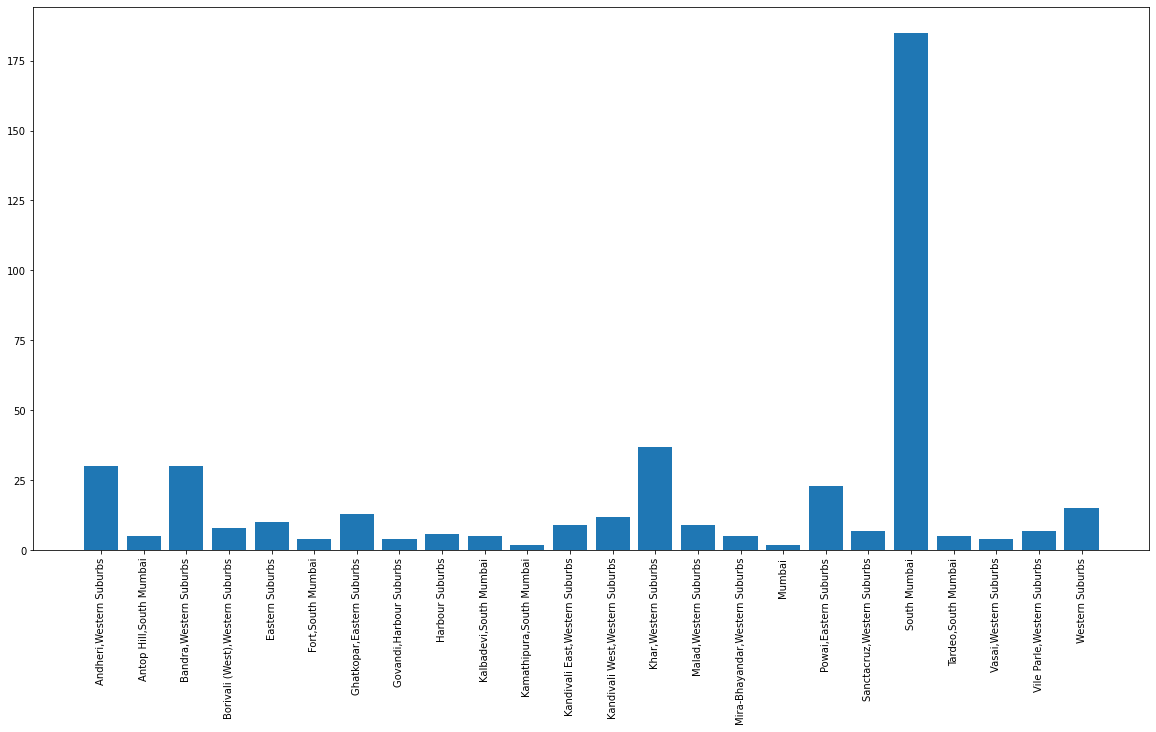

In [24]:
plt.figure(figsize = (20,10))
plt.xticks(rotation='vertical')
plt.bar(df_graph['Location'], df_graph['VenueName'])

In [25]:
mumbai_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add area and location column back to dataframe
mumbai_onehot['Area'] = venues_df['Area'] 
mumbai_onehot['Location'] = venues_df['Location']

fixed_columns = list(mumbai_onehot.columns[-2:]) + list(mumbai_onehot.columns[:-2])
mumbai_onehot = mumbai_onehot[fixed_columns]

print(mumbai_onehot.shape)
mumbai_onehot

(437, 127)


,Area,Location,Amphitheater,Aquarium,Arcade,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Auto Garage,Auto Workshop,...,Steakhouse,Tea Room,Theater,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop
0,Amboli,"Andheri,Western Suburbs",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Amboli,"Andheri,Western Suburbs",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Amboli,"Andheri,Western Suburbs",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amboli,"Andheri,Western Suburbs",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,"Chakala, Andheri",Western Suburbs,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,Dava Bazaar,South Mumbai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433,Dava Bazaar,South Mumbai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
434,Dava Bazaar,South Mumbai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,Dharavi,Mumbai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
## Locations grouped by area first
mumbai_grouped_area = mumbai_onehot.groupby(['Area', "Location"]).mean().reset_index()

print(mumbai_grouped_area.shape)
mumbai_grouped_area

(76, 127)


,Area,Location,Amphitheater,Aquarium,Arcade,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Auto Garage,Auto Workshop,...,Steakhouse,Tea Room,Theater,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop
0,Altamount Road,South Mumbai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00
1,Amboli,"Andheri,Western Suburbs",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.25
2,Amrut Nagar,"Ghatkopar,Eastern Suburbs",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00
3,Asalfa,"Ghatkopar,Eastern Suburbs",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00
4,Ballard Estate,"Fort,South Mumbai",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Uttan,"Mira-Bhayandar,Western Suburbs",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00
72,Vidyavihar,Eastern Suburbs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.00
73,Vile Parle,Western Suburbs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.00
74,Walkeshwar,South Mumbai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00


In [28]:
valid_areas = mumbai_grouped_area['Area'].tolist()

In [29]:
mumbai_df_final = mumbai_df[mumbai_df['Area'].isin(valid_areas)]
mumbai_df_final.shape

(76, 4)

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ['Area', 'Location']
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
area_venues_sorted = pd.DataFrame(columns=columns)
area_venues_sorted['Area'] = mumbai_grouped_area['Area']
area_venues_sorted['Location'] = mumbai_grouped_area['Location']

for ind in np.arange(mumbai_grouped_area.shape[0]):
    row_categories = mumbai_grouped_area.iloc[ind, :].iloc[3:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    area_venues_sorted.iloc[ind, 2:] = row_categories_sorted.index.values[0:num_top_venues]

# neighborhoods_venues_sorted.sort_values(freqColumns, inplace=True)
print(area_venues_sorted.shape)
area_venues_sorted

(76, 12)


,Area,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altamount Road,South Mumbai,Café,Wine Shop,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Electronics Store,Falafel Restaurant
1,Amboli,"Andheri,Western Suburbs",Wine Shop,Sandwich Place,Playground,Coffee Shop,Arts & Entertainment,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant
2,Amrut Nagar,"Ghatkopar,Eastern Suburbs",Bagel Shop,Shopping Mall,Cajun / Creole Restaurant,Wine Shop,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
3,Asalfa,"Ghatkopar,Eastern Suburbs",Light Rail Station,Wine Shop,Food & Drink Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Electronics Store
4,Ballard Estate,"Fort,South Mumbai",Harbor / Marina,Convenience Store,Hotel,Food,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
...,...,...,...,...,...,...,...,...,...,...,...,...
71,Uttan,"Mira-Bhayandar,Western Suburbs",Food & Drink Shop,Indian Restaurant,Bus Station,Juice Bar,Resort,Falafel Restaurant,Flea Market,Fast Food Restaurant,Farmers Market,Diner
72,Vidyavihar,Eastern Suburbs,Fast Food Restaurant,Restaurant,Train Station,Bus Station,Wine Shop,Electronics Store,Flea Market,Farmers Market,Falafel Restaurant,Diner
73,Vile Parle,Western Suburbs,Turkish Restaurant,Wine Shop,Food & Drink Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Electronics Store
74,Walkeshwar,South Mumbai,Lighthouse,Indian Restaurant,Coffee Shop,Gym,Wine Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store


In [31]:
mumbai_grouped_location = mumbai_onehot.groupby(['Location']).mean().reset_index()

print(mumbai_grouped_location.shape)
mumbai_grouped_location

(24, 126)


,Location,Amphitheater,Aquarium,Arcade,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,...,Steakhouse,Tea Room,Theater,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop
0,"Andheri,Western Suburbs",0.000000,0.000,0.000000,0.0,0.033333,0.000000,0.033333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333
1,"Antop Hill,South Mumbai",0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Bandra,Western Suburbs",0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000
3,"Borivali (West),Western Suburbs",0.000000,0.125,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Eastern Suburbs,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Fort,South Mumbai",0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,"Ghatkopar,Eastern Suburbs",0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"Govandi,Harbour Suburbs",0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Harbour Suburbs,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"Kalbadevi,South Mumbai",0.000000,0.000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ['Location']
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
location_venues_sorted = pd.DataFrame(columns=columns)
location_venues_sorted['Location'] = mumbai_grouped_location['Location']

for ind in np.arange(mumbai_grouped_location.shape[0]):
    row_categories = mumbai_grouped_location.iloc[ind, :].iloc[3:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    location_venues_sorted.iloc[ind, 1:] = row_categories_sorted.index.values[0:num_top_venues]

# neighborhoods_venues_sorted.sort_values(freqColumns, inplace=True)
print(location_venues_sorted.shape)
location_venues_sorted

(24, 11)


,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Andheri,Western Suburbs",Coffee Shop,Bar,Seafood Restaurant,Ice Cream Shop,Chinese Restaurant,Pub,Bistro,Boutique,Café,Bakery
1,"Antop Hill,South Mumbai",Café,Ice Cream Shop,Dessert Shop,Flower Shop,Food & Drink Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Electronics Store
2,"Bandra,Western Suburbs",Indian Restaurant,Bakery,Café,Chinese Restaurant,Gourmet Shop,Snack Place,Clothing Store,Cocktail Bar,Cupcake Shop,Dessert Shop
3,"Borivali (West),Western Suburbs",Indian Restaurant,Bank,Liquor Store,Fast Food Restaurant,Seafood Restaurant,Bar,Convenience Store,BBQ Joint,French Restaurant,Dim Sum Restaurant
4,Eastern Suburbs,Multiplex,Fast Food Restaurant,Café,Restaurant,Shopping Mall,Bus Station,Train Station,Fried Chicken Joint,Sports Bar,Farmers Market
5,"Fort,South Mumbai",Harbor / Marina,Convenience Store,Hotel,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Electronics Store
6,"Ghatkopar,Eastern Suburbs",Indian Restaurant,Snack Place,Shopping Mall,Gym / Fitness Center,Light Rail Station,Fast Food Restaurant,Diner,Cajun / Creole Restaurant,Ice Cream Shop,Bagel Shop
7,"Govandi,Harbour Suburbs",Pool,Smoke Shop,Bar,Wine Shop,Falafel Restaurant,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store
8,Harbour Suburbs,Indian Restaurant,Diner,Gastropub,Sports Bar,General Entertainment,Light Rail Station,Dim Sum Restaurant,Electronics Store,Food,Dessert Shop
9,"Kalbadevi,South Mumbai",Arts & Crafts Store,Sandwich Place,Bus Station,Juice Bar,Fast Food Restaurant,Wine Shop,Farmers Market,Flower Shop,Flea Market,Electronics Store


In [33]:
mumbai_grouped_clustering = mumbai_grouped_area.drop(['Area', 'Location'], 1)
mumbai_grouped_clustering

,Amphitheater,Aquarium,Arcade,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,...,Steakhouse,Tea Room,Theater,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.25
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00
72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.00
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.00
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00


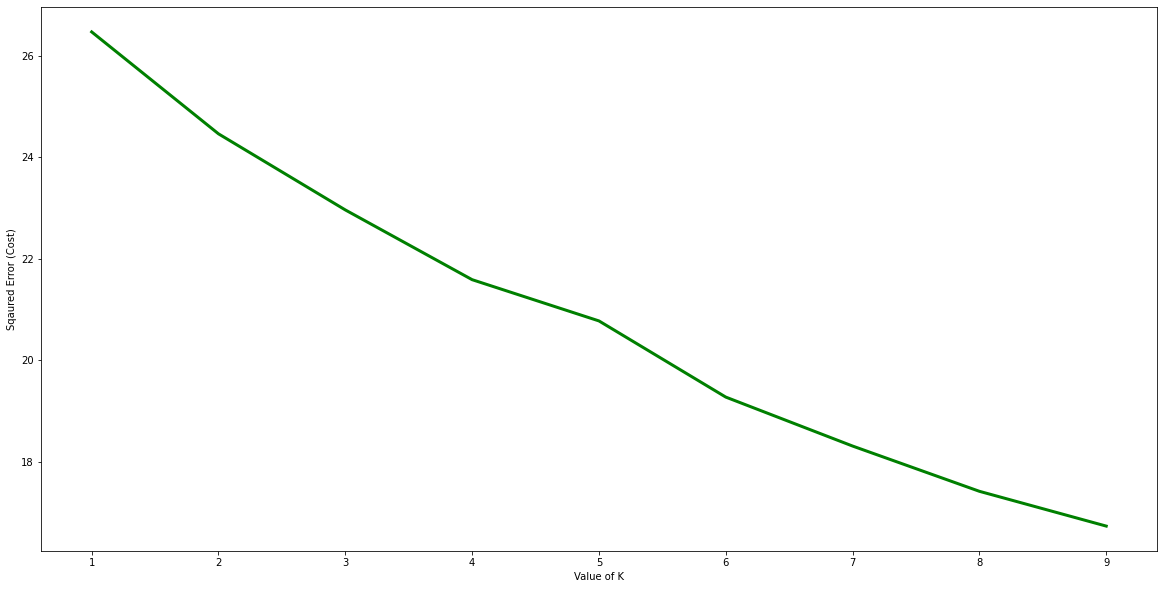

In [34]:
cost =[] 
for i in range(1, 10):
    KM = KMeans(n_clusters = i, max_iter = 270) 
    KM.fit(mumbai_grouped_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
plt.figure(figsize = (20,10))  
plt.plot(range(1, 10), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot

In [35]:
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mumbai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 3, 0, 0, 0, 3, 1, 0, 0], dtype=int32)

In [36]:
mumbai_grouped_clustering.shape

(76, 125)

In [38]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighbourhood.
mumbai_merged = mumbai_df_final.copy()

# add clustering labels
mumbai_merged["Cluster Labels"] = kmeans.labels_

# merge mumbai_merged with mumbai_df to add latitude/longitude for each area
mumbai_merged = mumbai_merged.join(area_venues_sorted.drop(["Location"], 1).set_index("Area"), on="Area")

print(mumbai_merged.shape)
mumbai_merged.head() # check the last columns!

(76, 15)


,Area,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,0,Wine Shop,Sandwich Place,Playground,Coffee Shop,Arts & Entertainment,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,0,Multiplex,Indian Restaurant,Restaurant,Asian Restaurant,Auto Workshop,Cocktail Bar,Café,Wine Shop,Fast Food Restaurant,Farmers Market
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373,3,Boutique,Arts & Entertainment,Wine Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Electronics Store,Falafel Restaurant
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.82927,0,Coffee Shop,Wine Shop,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Electronics Store,Falafel Restaurant
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743,0,Indian Restaurant,Auto Garage,Snack Place,Bar,Bakery,Wine Shop,Farmers Market,Food,Flower Shop,Flea Market


In [39]:
mumbai_merged.sort_values(["Cluster Labels"], inplace=True)
print(mumbai_merged.shape)
mumbai_merged.head()

(76, 15)


,Area,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,0,Wine Shop,Sandwich Place,Playground,Coffee Shop,Arts & Entertainment,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant
31,Naigaon,"Vasai,Western Suburbs",19.351467,72.846343,0,Platform,Train Station,Wine Shop,Food,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
35,Vile Parle,Western Suburbs,19.1,72.83,0,Turkish Restaurant,Wine Shop,Food & Drink Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Electronics Store
37,Amrut Nagar,"Ghatkopar,Eastern Suburbs",19.102077,72.912835,0,Bagel Shop,Shopping Mall,Cajun / Creole Restaurant,Wine Shop,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
39,Pant Nagar,"Ghatkopar,Eastern Suburbs",19.08,72.91,0,Snack Place,Indian Restaurant,Ice Cream Shop,Shopping Mall,Fast Food Restaurant,Diner,Gym / Fitness Center,Department Store,Dessert Shop,Dim Sum Restaurant


In [40]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, area, location, cluster in zip(mumbai_merged['Latitude'], mumbai_merged['Longitude'], mumbai_merged['Area'], mumbai_merged['Location'], mumbai_merged['Cluster Labels']):
    label = folium.Popup('{} ({}): - Cluster {}'.format(area, location, cluster), parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [41]:
top_venues = []

In [42]:

c0 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 0, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]
c0

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Andheri,Western Suburbs",Wine Shop,Sandwich Place,Playground,Coffee Shop,Arts & Entertainment,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant
31,"Vasai,Western Suburbs",Platform,Train Station,Wine Shop,Food,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
35,Western Suburbs,Turkish Restaurant,Wine Shop,Food & Drink Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Electronics Store
37,"Ghatkopar,Eastern Suburbs",Bagel Shop,Shopping Mall,Cajun / Creole Restaurant,Wine Shop,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
39,"Ghatkopar,Eastern Suburbs",Snack Place,Indian Restaurant,Ice Cream Shop,Shopping Mall,Fast Food Restaurant,Diner,Gym / Fitness Center,Department Store,Dessert Shop,Dim Sum Restaurant
44,"Powai,Eastern Suburbs",Indian Restaurant,Coffee Shop,Fast Food Restaurant,Bar,Lounge,Dessert Shop,Department Store,Cupcake Shop,Pizza Place,Chinese Restaurant
45,"Powai,Eastern Suburbs",Concert Hall,Playground,Café,Convenience Store,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
55,South Mumbai,Bakery,Café,Snack Place,Indian Restaurant,Other Great Outdoors,Coffee Shop,Japanese Restaurant,Chinese Restaurant,Salon / Barbershop,Fast Food Restaurant
60,South Mumbai,Garden,Wine Shop,Food & Drink Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Electronics Store
62,South Mumbai,Coffee Shop,Wine Shop,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Electronics Store,Falafel Restaurant


In [43]:
c0["1st Most Common Venue"].value_counts()


Indian Restaurant        7
Coffee Shop              3
Café                     2
Turkish Restaurant       2
Harbor / Marina          1
Bookstore                1
Performing Arts Venue    1
Wine Shop                1
Multiplex                1
Bakery                   1
Chinese Restaurant       1
Platform                 1
Bagel Shop               1
Convenience Store        1
Snack Place              1
Concert Hall             1
Gym                      1
General Entertainment    1
Garden                   1
Cupcake Shop             1
Dessert Shop             1
Pharmacy                 1
Pizza Place              1
Arts & Crafts Store      1
Leather Goods Store      1
Ice Cream Shop           1
Name: 1st Most Common Venue, dtype: int64

In [44]:
c1 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 1, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]
c1

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,"Mira-Bhayandar,Western Suburbs",Food & Drink Shop,Indian Restaurant,Bus Station,Juice Bar,Resort,Falafel Restaurant,Flea Market,Fast Food Restaurant,Farmers Market,Diner
69,South Mumbai,Fast Food Restaurant,Indian Restaurant,Seafood Restaurant,Café,Shop & Service,Bus Station,Cheese Shop,Bank,Flea Market,Farmers Market
66,South Mumbai,Bakery,Coffee Shop,Salon / Barbershop,Bar,Sandwich Place,Italian Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Electronics Store
71,South Mumbai,Cupcake Shop,Waterfront,Train Station,Chinese Restaurant,Wine Shop,Electronics Store,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
78,South Mumbai,Indian Restaurant,Ice Cream Shop,Bakery,Café,Sandwich Place,Dessert Shop,Dim Sum Restaurant,Diner,Food,Falafel Restaurant
74,South Mumbai,Italian Restaurant,Coffee Shop,Indian Restaurant,Fast Food Restaurant,Shopping Mall,French Restaurant,Sandwich Place,Movie Theater,Wine Shop,Falafel Restaurant
75,South Mumbai,Indian Restaurant,Café,Fast Food Restaurant,Pizza Place,Smoke Shop,Theater,Chinese Restaurant,Falafel Restaurant,Electronics Store,Wine Shop
76,South Mumbai,Breakfast Spot,Indian Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,Tea Room,Diner,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
84,"Kalbadevi,South Mumbai",Juice Bar,Wine Shop,Food & Drink Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Electronics Store
88,South Mumbai,Indian Restaurant,Electronics Store,Food & Drink Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant


In [45]:
c2 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 2, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]
c2

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,"Govandi,Harbour Suburbs",Pool,Smoke Shop,Bar,Wine Shop,Electronics Store,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Diner
90,South Mumbai,Ice Cream Shop,Fast Food Restaurant,Market,Cheese Shop,Indian Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Food & Drink Shop


In [162]:
c3 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 3, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]
c3

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
54,South Mumbai,Indian Restaurant,Dessert Shop,Jewelry Store,Wine Shop,Food & Drink Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Electronics Store
77,South Mumbai,Lighthouse,Indian Restaurant,Coffee Shop,Gym,Wine Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
2,"Andheri,Western Suburbs",Boutique,Arts & Entertainment,Wine Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Electronics Store,Falafel Restaurant
87,South Mumbai,Coffee Shop,Café,Hotel,Indian Restaurant,Fast Food Restaurant,Restaurant,Juice Bar,Snack Place,Wine Shop,Farmers Market
63,South Mumbai,Indian Restaurant,Bakery,Multiplex,Café,Food Truck,Portuguese Restaurant,Bar,Mexican Restaurant,Flea Market,Music Store
7,"Andheri,Western Suburbs",Ice Cream Shop,Chinese Restaurant,Pub,Seafood Restaurant,South Indian Restaurant,Dessert Shop,Dim Sum Restaurant,Café,Salon / Barbershop,North Indian Restaurant


In [46]:
c4 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 4, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]
c4

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
58,South Mumbai,Wine Bar,Mediterranean Restaurant,Restaurant,Hotel,Gym / Fitness Center,Gym,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop
27,"Khar,Western Suburbs",Indian Restaurant,Bar,Pub,Dessert Shop,Market,Lounge,Beer Bar,Café,Wine Shop,Flea Market


In [47]:
c5 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 5, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]
c5

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,"Vasai,Western Suburbs",Indian Restaurant,Bus Station,Food & Drink Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Electronics Store,Falafel Restaurant


In [49]:
venue_frequency = mumbai_merged[['Cluster Labels', '1st Most Common Venue']].groupby(['1st Most Common Venue']).count().reset_index()
venue_frequency.head()

,1st Most Common Venue,Cluster Labels
0,Aquarium,1
1,Arts & Crafts Store,1
2,Bagel Shop,1
3,Bakery,4
4,Bookstore,1


<BarContainer object of 42 artists>

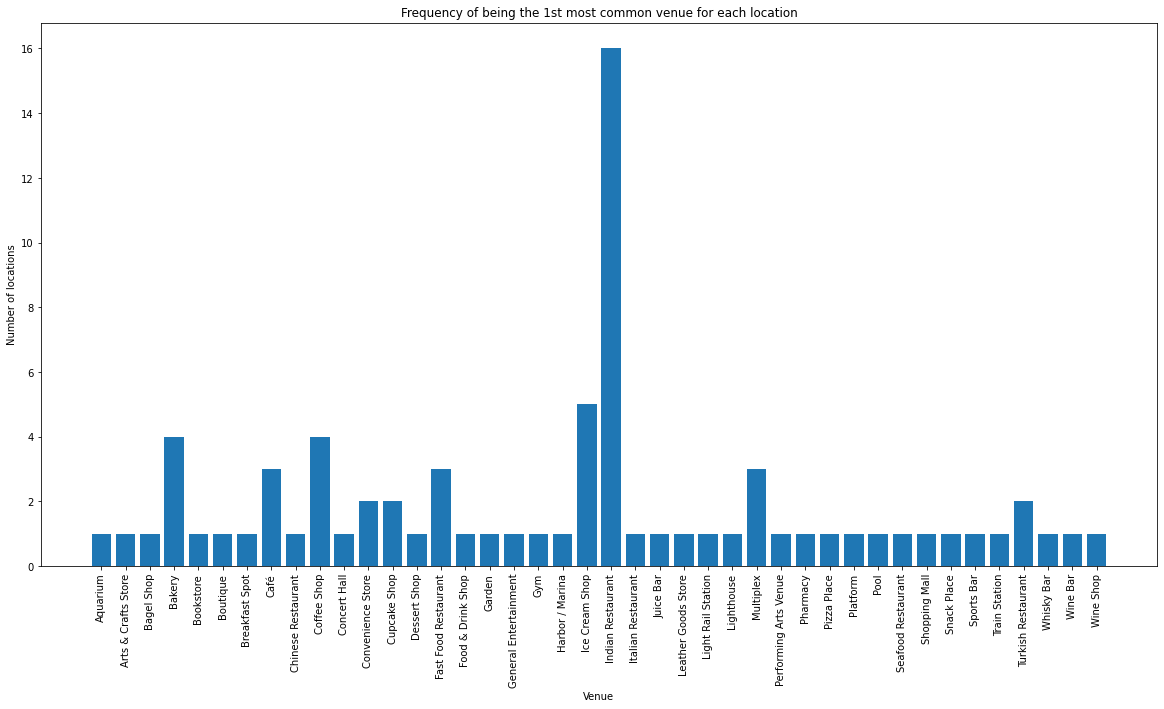

In [50]:
plt.figure(figsize = (20,10))
plt.xlabel('Venue')
plt.ylabel('Number of locations')
plt.title('Frequency of being the 1st most common venue for each location')
plt.xticks(rotation='vertical')
# in venue_df, 'Cluster Labels' is actually the number of clusters the venue is in the 1st most common venue
plt.bar(venue_frequency['1st Most Common Venue'], venue_frequency['Cluster Labels'])